In [57]:
import numpy as np

In [58]:
import pandas as pd

In [59]:
from pandas import Series, DataFrame

In [60]:
import matplotlib.pyplot as plt

In [61]:
import seaborn as sns

In [62]:
sns.set_style("whitegrid")

In [63]:
%matplotlib inline

In [64]:
import pandas_datareader.data as web

In [65]:
from pandas_datareader.data import DataReader

In [66]:
import datetime

In [67]:
from datetime import datetime

In [323]:
'''

The learning will happen using a work done on a portfolio of technology stocks. Pandas will be used to get 
stock information (from internet sources such as Yahoo! Finance, Google Finance, et cetera - this data will 
be read using the pandas_datareader imported above), visualize different aspects of stock information, and 
use previous performance history to look at different ways to evaluate the risk of a stock. Also, Monte Carlo 
techniques will be used to predict stock prices.


Questions to be answered are:

    1) What were the daily changes in price of the technology stocks being evaluated?

    2) What can Pandas do to help show what the average daily return of each stock was?

    3) What were the moving averages of some of the stocks?

    4) What, if any, correlations exist between the daily returns of various stocks? 

    5) What, if any, correlations exist between the closing prices of various stocks? 

    6) What insights can doing some basic risk analysis uncover about the potential 
       amount of value that is put at risk by investing in a particular stock?

    7) What predictions about future stock behavior can be predicted by looking at 
       previous stock behavior?
       
       - Note: It is not, actually, possible to predict the future price of a stock solely 
         based on the stock’s past performance (the [Efficient Market Hypothesis](http://pages.stern.nyu.edu/~adamodar/New_Home_Page/invemgmt/effdefn.htm) 
         explains why), but it IS possible to do a bit of risk analysis based on how stock 
         simulations work out.  
    
'''

'\n\nThe learning will happen using a work done on a portfolio of technology stocks. Pandas will be used to get \nstock information (from internet sources such as Yahoo! Finance, Google Finance, et cetera - this data will \nbe read using the pandas_datareader imported above), visualize different aspects of stock information, and \nuse previous performance history to look at different ways to evaluate the risk of a stock. Also, Monte Carlo \ntechniques will be used to predict stock prices.\n\n\nQuestions to be answered are:\n\n    1) What were the daily changes in price of the technology stocks being evaluated?\n\n    2) What can Pandas do to help show what the average daily return of each stock was?\n\n    3) What were the moving averages of some of the stocks?\n\n    4) What, if any, correlations exist between the daily returns of various stocks? \n\n    5) What, if any, correlations exist between the closing prices of various stocks? \n\n    6) What insights can doing some basic risk

In [324]:
techList = ["AAPL", "GOOG", "MSFT", "AMZN"]

In [325]:
'''
The above is the creation of a list with the stock tickers for Apple, Google, Microsoft, and Amazon 
passed through it.
'''

'\nThe above is the creation of a list with the stock tickers for Apple, Google, Microsoft, and Amazon \npassed through it.\n'

In [326]:
end = datetime.now(); # Setting up a start and end time for the data grab. 
start = datetime(end.year - 1, end.month,end.day); # It is set to start a year ago from today's date end today.

In [327]:
for stock in techList:   
    globals()[stock] = DataReader(stock, "yahoo", start, end)

In [328]:
'''
Above, a for loop is created to grab finance data then set that data as a DataFrame. Then, globals is 
used to take each stock ticker from the string in techList and turn that collective data into a global 
variable. The specifics of doing that calls DataReader for every stock in the techList. DataReader takes 
4 arguments (one for the stock ticker, one for the finance website to be used for grabbing the data, one 
for the start date, and one for the end date). Below I will check to see if, when I call a stock ticker 
for one of the stocks in the techList list, it returns a DataFrame.
'''

'\nAbove, a for loop is created to grab finance data then set that data as a DataFrame. Then, globals is \nused to take each stock ticker from the string in techList and turn that collective data into a global \nvariable. The specifics of doing that calls DataReader for every stock in the techList. DataReader takes \n4 arguments (one for the stock ticker, one for the finance website to be used for grabbing the data, one \nfor the start date, and one for the end date). Below I will check to see if, when I call a stock ticker \nfor one of the stocks in the techList list, it returns a DataFrame.\n'

In [329]:
MSFT

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-22,42.669998,43.130001,42.549999,42.990002,25064300,41.848041
2015-04-23,42.889999,43.610001,42.799999,43.340000,46309500,42.188742
2015-04-24,45.660000,48.139999,45.650002,47.869999,130933700,46.598409
2015-04-27,47.230000,48.130001,47.220001,48.029999,59248200,46.754158
2015-04-28,47.779999,49.209999,47.700001,49.160000,60730800,47.854143
2015-04-29,48.720001,49.310001,48.500000,49.060001,47804600,47.756801
2015-04-30,48.700001,49.540001,48.599998,48.639999,64725500,47.347955
2015-05-01,48.580002,48.880001,48.400002,48.660000,38937300,47.367425
2015-05-04,48.369999,48.869999,48.180000,48.240002,34039500,46.958583


In [330]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-22,534.402426,541.082428,531.752397,539.367458,1593500,539.367458
2015-04-23,541.002435,550.962490,540.232440,547.002472,4184800,547.002472
2015-04-24,566.102584,571.142590,557.252507,565.062561,4932500,565.062561
2015-04-27,563.390015,565.950012,553.200012,555.369995,2398000,555.369995
2015-04-28,554.640015,556.020020,550.366028,553.679993,1491000,553.679993


In [331]:
AMZN.info() # For some general info on some of the data.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-04-22 to 2016-04-21
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [332]:
AAPL.describe() # The Apple stock will be used to get a better feel for the data.

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,114.034387,115.117273,112.812609,113.968814,4.853035e+07,113.004516
std,10.876849,10.727620,10.944442,10.790382,2.102264e+07,10.199185
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,107.010002,107.790001,105.570000,106.720001,3.404820e+07,106.243496
50%,113.669998,115.050003,112.370003,113.760002,4.452590e+07,112.673677
75%,123.849998,124.639999,122.540001,123.379997,5.555040e+07,121.640470
max,134.460007,134.539993,131.399994,132.649994,1.622063e+08,130.671320


In [333]:
'''
To take into account any changes in the stock, the adjusted closing price will be used to 
do some historical data analysis.
'''

'\nTo take into account any changes in the stock, the adjusted closing price will be used to \ndo some historical data analysis.\n'

In [334]:
AAPL.columns # … to check to see if there are any spaces at the beginning or end of the column names

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

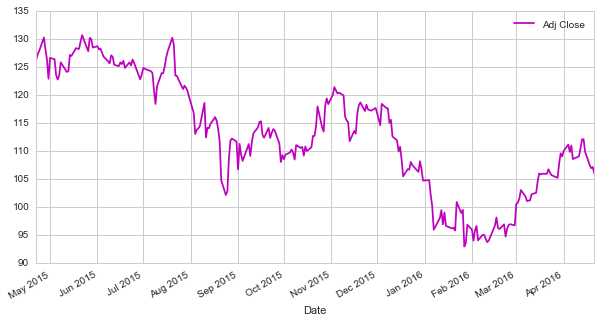

In [335]:
AAPL["Adj Close"].plot(legend = True, figsize = (10, 5), c = "m")

In [336]:
'''
Starting with a bit of basic analysis, I will look at a historical view of the closing price 
for Apple stock using Pandas’ plot method. For the plot above, two arguments are passed: the 
legend = True so that it displays a legend and a 10 by 5 size figure to improve readability.
The color was set to magenta.
'''

'\nStarting with a bit of basic analysis, I will look at a historical view of the closing price \nfor Apple stock using Pandas’ plot method. For the plot above, two arguments are passed: the \nlegend = True so that it displays a legend and a 10 by 5 size figure to improve readability.\nThe color was set to magenta.\n'

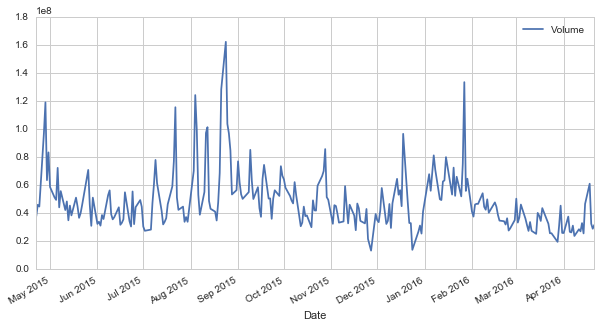

In [337]:
AAPL["Volume"].plot(legend = True, figsize = (10, 5))

In [338]:
'''
Above, the “Volume” column is called to plot the total volume of stock being traded each 
day over the past year.
'''

'\nAbove, the “Volume” column is called to plot the total volume of stock being traded each \nday over the past year.\n'

In [339]:
'''
Question #3 is "What were the moving averages of some of the stocks?" Moving averages can relay
insights on trends within the data. 

Calculating the moving average for the stock will be done by taking in all of the prices over a 
certain time period (in this case, one year) and averaging them out. 

To start, I will calculate several moving averages - one for 15 days, one for 30 days, and 
another for 45 days. The following list will hold those days.
'''

'\nQuestion #3 is "What were the moving averages of some of the stocks?" Moving averages can relay\ninsights on trends within the data. \n\nCalculating the moving average for the stock will be done by taking in all of the prices over a \ncertain time period (in this case, one year) and averaging them out. \n\nTo start, I will calculate several moving averages - one for 15 days, one for 30 days, and \nanother for 45 days. The following list will hold those days.\n'

In [340]:
maDays = [15, 30, 45];

for ma in maDays:
    columnName = "MA for %s days" %(str(ma));
    AAPL[columnName] = AAPL["Adj Close"].rolling(ma, center = False).mean();

In [341]:
'''
Above is a for loop creating a string to serve as a column name. This new column name is 
labeled as “MA for %s days” - the moving average for the string of either day 15, day 30, 
or day 45, and the string version of that number is then called. 

Below that, based on the column name that was created (columnName), a new column is added 
to the Apple stock ticker DataFrame. Pandas’ rolling mean is called taking two arguments: 
the name of the adjusted closing price column, and also the number of days to be shown for 
that moving average. 
'''

'\nAbove is a for loop creating a string to serve as a column name. This new column name is \nlabeled as “MA for %s days” - the moving average for the string of either day 15, day 30, \nor day 45, and the string version of that number is then called. \n\nBelow that, based on the column name that was created (columnName), a new column is added \nto the Apple stock ticker DataFrame. Pandas’ rolling mean is called taking two arguments: \nthe name of the adjusted closing price column, and also the number of days to be shown for \nthat moving average. \n'

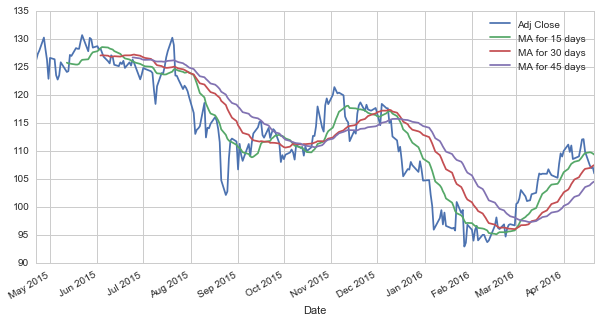

In [342]:
AAPL[["Adj Close", "MA for 15 days", "MA for 30 days", "MA for 45 days"]].plot(subplots = False, figsize = (10, 5))

In [343]:
'''
Above, to plot all of the additional moving averages, a list of column names was passed into a DataFrame: 
one for the adjusted closing prices, one for the moving average for for 15 days, one for the moving 
average for 30 days, and one for the moving average for 45 days. Then, the plot method was called for them. 
To avoid the creation of a separate plot for each column, the subplots were set to false to get them all 
onto one plot.

Taking the moving averages over a larger span of days results in a smoother line, because the trend is less 
sensitive to the daily fluctuations.

'''

'\nAbove, to plot all of the additional moving averages, a list of column names was passed into a DataFrame: \none for the adjusted closing prices, one for the moving average for for 15 days, one for the moving \naverage for 30 days, and one for the moving average for 45 days. Then, the plot method was called for them. \nTo avoid the creation of a separate plot for each column, the subplots were set to false to get them all \nonto one plot.\n\nTaking the moving averages over a larger span of days results in a smoother line, because the trend is less \nsensitive to the daily fluctuations.\n\n'

In [344]:
'''
Question #2 was "What can Pandas do to help show what the average daily return of each stock was?" Answering 
question #2 requires taking a closer look at the daily changes of the stock (as opposed to just its absolute value). 

'''

'\nQuestion #2 was "What can Pandas do to help show what the average daily return of each stock was?" Answering \nquestion #2 requires taking a closer look at the daily changes of the stock (as opposed to just its absolute value). \n\n'

In [345]:
AAPL["Daily Return"] = AAPL["Adj Close"].pct_change()

In [346]:
'''
The above uses Pandas to retrieve the daily returns for the Apple stock by making a new column called 
“Daily Return” then setting that equal to the adjusted closing price column. Then, the percent change method 
was called onto it. That command finds the percent change for each day.
'''

'\nThe above uses Pandas to retrieve the daily returns for the Apple stock by making a new column called \n“Daily Return” then setting that equal to the adjusted closing price column. Then, the percent change method \nwas called onto it. That command finds the percent change for each day.\n'

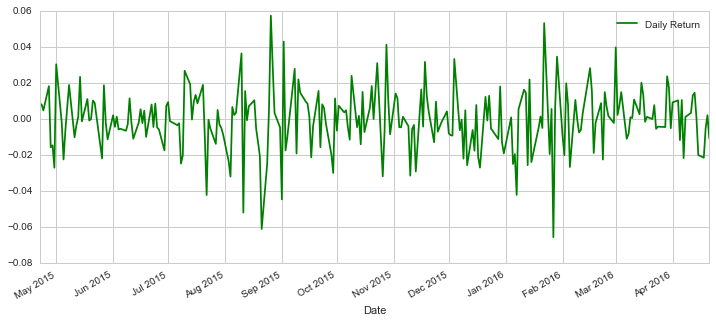

In [347]:
AAPL["Daily Return"].plot(figsize = (12, 5), legend = True, c = "g")

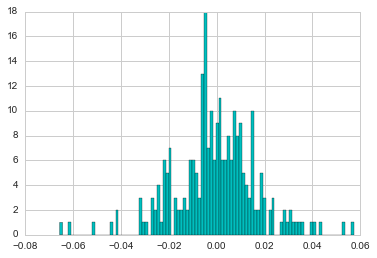

In [348]:
AAPL["Daily Return"].hist(bins = 100, color = "c")

In [349]:
'''
The above uses Pandas’ built-in histogram feature to plot a cyan-colored histogram with 100 bins.
'''

'\nThe above uses Pandas’ built-in histogram feature to plot a cyan-colored histogram with 100 bins.\n'

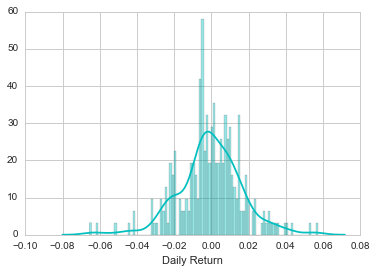

In [350]:
sns.distplot(AAPL["Daily Return"].dropna(), bins = 100, color = "c")

In [351]:
'''
The above called seaborn to plot a distplot for a histogram and a kde plot. NaN values 
cannot be read by seaborn, so those are eliminated with dropna.
'''

'\nThe above called seaborn to plot a distplot for a histogram and a kde plot. NaN values \ncannot be read by seaborn, so those are eliminated with dropna.\n'

In [352]:
closingDataFrame = DataReader(["AAPL", "GOOG", "MSFT", "AMZN"], "yahoo", start, end)["Adj Close"]

In [353]:
'''
The above builds a new DataFrame with all of the adjusted close columns for each 
of the 4 tech. stock DataFrames. The stock ticker names could have been replaced 
with the DataFrame "techList" to achieve the same result.
'''

'\nThe above builds a new DataFrame with all of the adjusted close columns for each \nof the 4 tech. stock DataFrames. The stock ticker names could have been replaced \nwith the DataFrame "techList" to achieve the same result.\n'

In [354]:
closingDataFrame.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-22,126.279121,389.799988,539.367458,41.848041
2015-04-23,127.310014,389.989990,547.002472,42.188742
2015-04-24,127.908913,445.100006,565.062561,46.598409
2015-04-27,130.235775,438.559998,555.369995,46.754158
2015-04-28,128.183816,429.309998,553.679993,47.854143


In [355]:
techDailyRet = closingDataFrame.pct_change() # Getting the daily return for all of the stocks.

In [356]:
techDailyRet.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-22,NaN,NaN,NaN,NaN
2015-04-23,0.008164,0.000487,0.014155,0.008141
2015-04-24,0.004704,0.141311,0.033016,0.104522
2015-04-27,0.018192,-0.014693,-0.017153,0.003342
2015-04-28,-0.015756,-0.021092,-0.003043,0.023527


In [357]:
'''
The next two questions are similar: "What, if any, correlations exist between the daily 
returns of various stocks?" and "What, if any, correlations exist between the closing 
prices of various stocks?" 
'''

'\nThe next two questions are similar: "What, if any, correlations exist between the daily \nreturns of various stocks?" and "What, if any, correlations exist between the closing \nprices of various stocks?" \n'

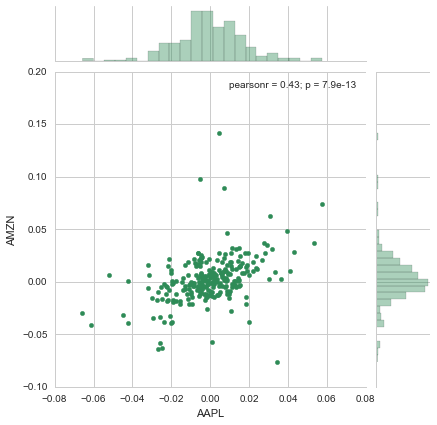

In [358]:
 sns.jointplot("AAPL", "AMZN", techDailyRet, kind = "scatter", color = "seagreen") 

In [359]:
'''
The above uses the seaborn jointplot feature to compare the daily return percentage for 
two stocks, Google and Microsoft, to see how they may be correlated (by plotting a 
histogram and a scatterplot). The Pearson product-moment correlation coefficient shown 
on the top-right of the plot shows that, at 0.43, there is not much of a correlation.
Probably because they are both technology stocks, there is some relatedness overall. 
However, there is not a strong correlation between the performance of one with the other.
'''

'\nThe above uses the seaborn jointplot feature to compare the daily return percentage for \ntwo stocks, Google and Microsoft, to see how they may be correlated (by plotting a \nhistogram and a scatterplot). The Pearson product-moment correlation coefficient shown \non the top-right of the plot shows that, at 0.43, there is not much of a correlation.\nProbably because they are both technology stocks, there is some relatedness overall. \nHowever, there is not a strong correlation between the performance of one with the other.\n'

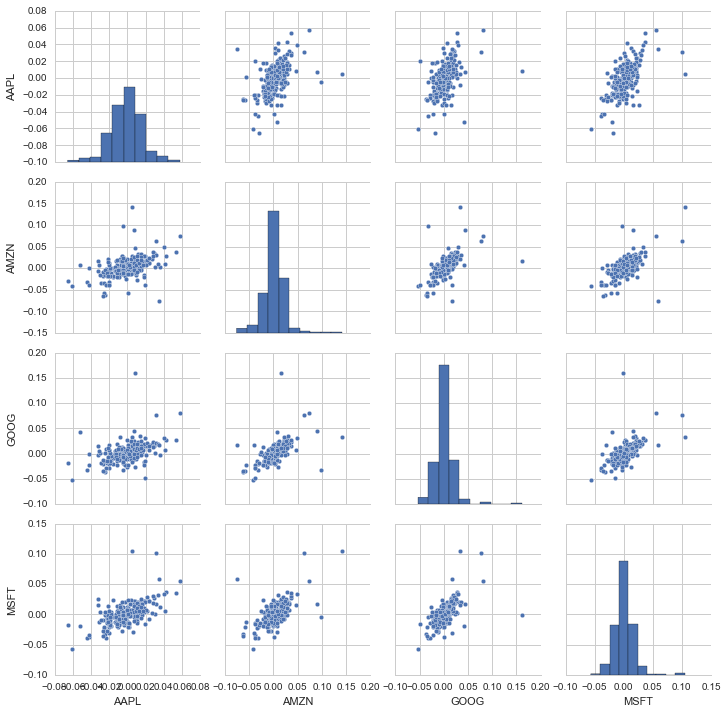

In [360]:
sns.pairplot(techDailyRet.dropna())

In [361]:
'''
The above uses seaborn and Pandas to repeat comparison analysis for every possible combination 
of stocks in the tech. stock portfolio. Seaborn was called, then pairplot with the tech. returns 
DataFrame passed through it (with all NaN values omitted). 
'''

'\nThe above uses seaborn and Pandas to repeat comparison analysis for every possible combination \nof stocks in the tech. stock portfolio. Seaborn was called, then pairplot with the tech. returns \nDataFrame passed through it (with all NaN values omitted). \n'

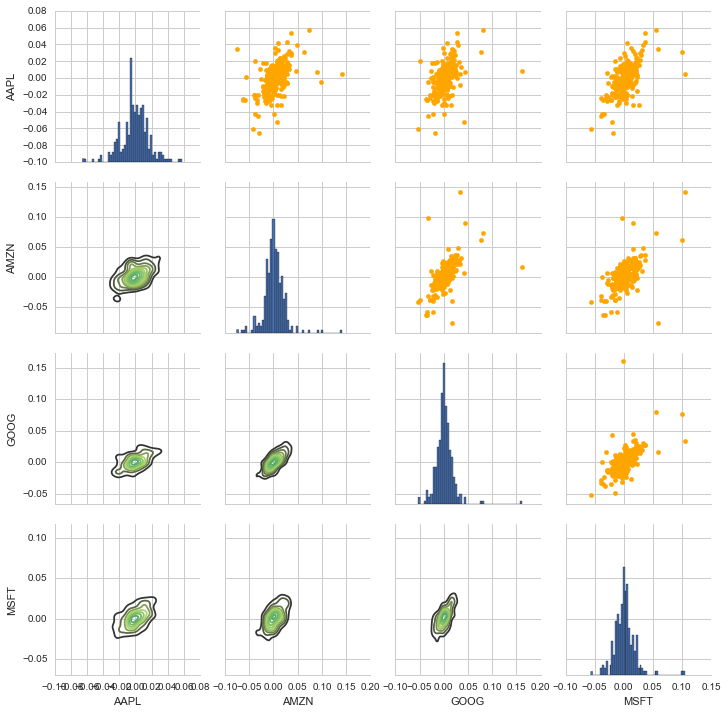

In [362]:
returnsFigure = sns.PairGrid(techDailyRet.dropna());

returnsFigure.map_upper(plt.scatter, color = "orange");

returnsFigure.map_lower(sns.kdeplot, cmap = "summer_d");

returnsFigure.map_diag(plt.hist, bins = 50);

In [363]:
'''
Above, seaborn pairgraid was called for even more control of the plotting. To start, a figure 
called “returnsFigure” was created and, in it, the tech. returns DataFrame was called and all 
of the missing data points were dropped. Next, three methods were passed onto it to customize 
the map’s upper area, lower, and diagonal. 

Below, the same technique will be used to analyze the correlation of the closing prices as well.
'''

'\nAbove, seaborn pairgraid was called for even more control of the plotting. To start, a figure \ncalled “returnsFigure” was created and, in it, the tech. returns DataFrame was called and all \nof the missing data points were dropped. Next, three methods were passed onto it to customize \nthe map’s upper area, lower, and diagonal. \n\nBelow, the same technique will be used to analyze the correlation of the closing prices as well.\n'

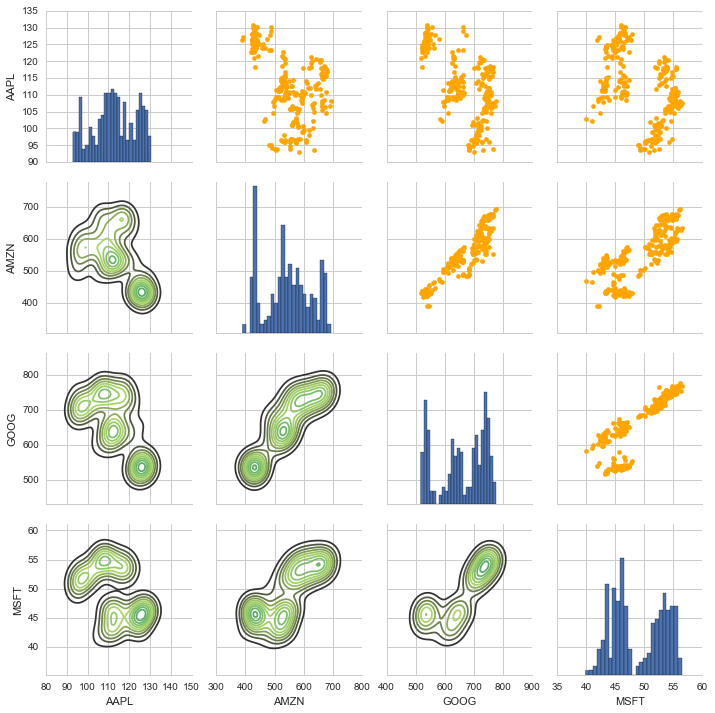

In [364]:
returnsFigure = sns.PairGrid(closingDataFrame.dropna());

returnsFigure.map_upper(plt.scatter, color = "orange");

returnsFigure.map_lower(sns.kdeplot, cmap = "summer_d");

returnsFigure.map_diag(plt.hist, bins = 25);

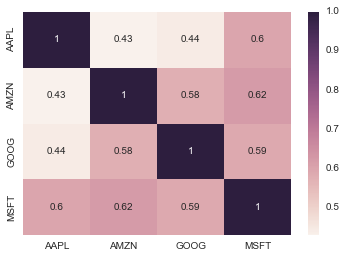

In [365]:
sns.heatmap(techDailyRet.corr(), annot = True)

In [366]:
'''
Above, seaborn was used to create a heatmap to see the actual numerical values of correlations 
between all of the stocks. Annotations were set to True so that the numbers would be displayed.
An interesting thing that the heatmap uncovered is that the correlation between Microsoft and 
Amazon is the highest of all of the tech. stocks in the collection.

The same heatmap could have been created with this code as well: 
sns.heatmap(techDailyRet.dropna().corr(), annot = True) 

Below is a heatmap for the closing prices.
'''

'\nAbove, seaborn was used to create a heatmap to see the actual numerical values of correlations \nbetween all of the stocks. Annotations were set to True so that the numbers would be displayed.\nAn interesting thing that the heatmap uncovered is that the correlation between Microsoft and \nAmazon is the highest of all of the tech. stocks in the collection.\n\nThe same heatmap could have been created with this code as well: \nsns.heatmap(techDailyRet.dropna().corr(), annot = True) \n\nBelow is a heatmap for the closing prices.\n'

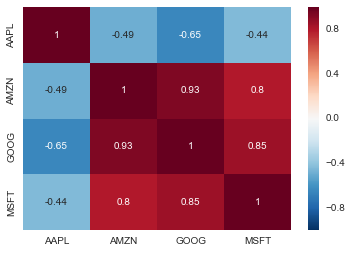

In [367]:
sns.heatmap(closingDataFrame.corr(), annot = True) # Google and Amazon have the strongest correlation in this one.

In [368]:
'''
Question #6 was "What insights can doing some basic risk analysis uncover about the 
potential amount of value that is put at risk by investing in a particular stock?"
'''

'\nQuestion #6 was "What insights can doing some basic risk analysis uncover about the \npotential amount of value that is put at risk by investing in a particular stock?"\n'

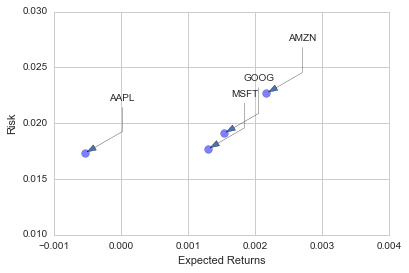

In [369]:
returns = techDailyRet.dropna();

area = np.pi * 20

plt.scatter(returns.mean(), returns.std(), alpha = 0.5, s = area);

plt.ylim([0.01, 0.03]);
plt.xlim([-0.001, 0.004]);

plt.xlabel("Expected Returns");
plt.ylabel("Risk")

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = "offset points", ha = "right", va = "bottom",
        arrowprops = dict(arrowstyle = "-|>, head_length = 0.9, head_width = 0.3", connectionstyle = "angle, angleA = -90, angleB = 30, rad = 0.1"));

In [370]:
 '''
A basic way to use the gathered information (on daily percentage returns) to help quantify
risk is to compare the expected return with the standard deviation of the daily returns. 

Above, a scatterplot was used to do that. A new DataFrame was created (returns) and it was 
set to equal the daily returns DataFrame (techDailyRet) with all null values discarded.

The areas of the circles for the scatterplot were given a defined area of π × 20 to improve 
visibility. 

The scatter plot was set to take the mean of returns be the x axis and the standard deviation 
was set to be the y-axis.

Following that, the labels were set as “Expected Return” for the x-axis and the “Risk” that 
the stock holds as being the y-axis' label.

For every column in the returns DataFrame, set x as being equal to the mean of that column 
and set y equal to the standard deviation. Zip is used to call: the returns column, returns 
mean, and the returns standard deviation all at once.

Below that, the label and various arguments are set for customizing the look of the plot.

Of the four stocks plotted to show the current trends, Google is showing the best balance 
of a strong expected return along with having a lower risk. To clarify, Amazon is showing 
as having a higher expected return. However, it is also showing a higher amount of risk 
associated with the stock. Similarly, Apple is showing the lowest amount of risk, but it 
is also showing the lowest expected returns.

'''

"\nA basic way to use the gathered information (on daily percentage returns) to help quantify\nrisk is to compare the expected return with the standard deviation of the daily returns. \n\nAbove, a scatterplot was used to do that. A new DataFrame was created (returns) and it was \nset to equal the daily returns DataFrame (techDailyRet) with all null values discarded.\n\nThe areas of the circles for the scatterplot were given a defined area of π × 20 to improve \nvisibility. \n\nThe scatter plot was set to take the mean of returns be the x axis and the standard deviation \nwas set to be the y-axis.\n\nFollowing that, the labels were set as “Expected Return” for the x-axis and the “Risk” that \nthe stock holds as being the y-axis' label.\n\nFor every column in the returns DataFrame, set x as being equal to the mean of that column \nand set y equal to the standard deviation. Zip is used to call: the returns column, returns \nmean, and the returns standard deviation all at once.\n\nBelow th

In [371]:
# Question #7 is "What predictions about future stock behavior can be predicted by looking at previous stock behavior?"

In [372]:
'''
The value at risk parameter can essentially be treated as the amount of money that an 
investor could expect to lose, or that an investor could be putting at risk for a given 
confidence interval. Two of of methods that can be used to get at these insights are:

  - the bootstrap method (which means using a histogram of daily returns to calculate 
    empirical quantiles as a way to help define a confidence interval).

  - The Monte Carlo Method (which allows for the running of many market simulations 
    under random market conditions, then doing calculations of portfolio losses for each
    simulation). This will be done using a Markov process - the Geometric Broanian Motion.
  
  
To start, Pandas' built-in quantile function can be used to get the risk value of the stock. 

'''

"\nThe value at risk parameter can essentially be treated as the amount of money that an \ninvestor could expect to lose, or that an investor could be putting at risk for a given \nconfidence interval. Two of of methods that can be used to get at these insights are:\n\n  - the bootstrap method (which means using a histogram of daily returns to calculate \n    empirical quantiles as a way to help define a confidence interval).\n\n  - The Monte Carlo Method (which allows for the running of many market simulations \n    under random market conditions, then doing calculations of portfolio losses for each\n    simulation). This will be done using a Markov process - the Geometric Broanian Motion.\n  \n  \nTo start, Pandas' built-in quantile function can be used to get the risk value of the stock. \n\n"

In [373]:
returns["AAPL"].quantile(0.05)

-0.026870597580305255

In [383]:
'''
Above, a quantile of 0.05 was called on the APPL part of the daily returns DataFrame. 

The value returned after running that was -0.027. Having 0.05 be set as the empirical quantile 
means that, with 95% confidence (so, with 95% of the simulations would be carried out with this 
dataset), the worst daily reduction in stock value to be expected would be no greater than 2.7%. 

Next will be the application of the Monte Carlo Method, done using the Geometric Browninan 
Motion (GBM) to model stock prices. The formula for GBM is: 


        ΔS=S(μΔt+σϵΔt‾‾‾√)


... or the change in the stock price as determined by:

    the current stock price multiplied by

    the average daily return multiplied by the change in time (drift)

    and

    the standard deviation of those returns multiplied by a random variable then multiplied 
    by the square root of the change in time (shock)
    
    
By looking at previous daily return values, it is possible to see whether a stock has drifted 
up or down during given time periods before having experienced a random shock. When the shock 
happens, the stock price would have either been pushed up or pushed down. 

Applying the Monte Carlo Method allows for that series of behaviors to be simulated thousands 
of times. Those simulations will be carried out by using the Google stock DataFrame to define 
the variables to be used. Then, an aggregation of all those simulations will be used to 
estimate how risky the stock is.  At the end, plotting a histogram will be used to help with 
doing risk analysis. 
    
'''

'\nAbove, a quantile of 0.05 was called on the APPL part of the daily returns DataFrame. \n\nThe value returned after running that was -0.027. Having 0.05 be set as the empirical quantile \nmeans that, with 95% confidence (so, with 95% of the simulations would be carried out with this \ndataset), the worst daily reduction in stock value to be expected would be no greater than 2.7%. \n\nNext will be the application of the Monte Carlo Method, done using the Geometric Browninan \nMotion (GBM) to model stock prices. The formula for GBM is: \n\n\n        ΔS=S(μΔt+σϵΔt‾‾‾√)\n\n\n... or the change in the stock price as determined by:\n\n    the current stock price multiplied by\n\n    the average daily return multiplied by the change in time (drift)\n\n    and\n\n    the standard deviation of those returns multiplied by a random variable then multiplied \n    by the square root of the change in time (shock)\n    \n    \nBy looking at previous daily return values, it is possible to see whether

In [387]:
days = 365

dt = 1/days

mu = returns.mean()["GOOG"]

sigma = returns.std()["GOOG"]

In [388]:
'''
Above, a time horizon of 356 days was set via the object “days”. Then, dt (delta time, or 
the change in time) was set to 1/days. Then mu (the average - associated for drift) was set 
to the mean of the daily returns of the Google stock column. Then sigma (the volatility of 
the stock) was set to the standard deviation of the daily returns.
'''

'\nAbove, a time horizon of 356 days was set via the object “days”. Then, dt (delta time, or \nthe change in time) was set to 1/days. Then mu (the average - associated for drift) was set \nto the mean of the daily returns of the Google stock column. Then sigma (the volatility of \nthe stock) was set to the standard deviation of the daily returns.\n'

In [389]:
def stockMonteCarlo(startPrice, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = startPrice

    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))

        drift[x] = mu * dt

        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [390]:
'''
Above, a function was created (stockMonteCarlo) that was set to take in the starting price 
(startPrice), number of days for the simulation to be run (days), the average return (mu), 
then the standard deviation on the daily return (sigma).

Next, a price array was defined as being equal to an array of zeros with the same length as 
days. Then the first term was set to be the starting price (startPrice).

The shock and drift were set to another array. 

The price array was set to run for a number of days (from 1 until the days in that range).
And, for every day the simulation moves along, the following is calculated:

The shock of x at a point in time was set to being equal to a normal distribution with its 
center around mu (the average return) multiplied by dt (change in time) with a scale that 
is pulled from the GBM equation.

The drift term at that particular moment in time was set as being equal to mu (the average 
return) multiplied by dt (change in time).

The price at that moment was set as being equal to the previous price plus the product of 
the previous price (yes, itself) multiplied by the sum of the drift at that time and the 
shock at that time.

The function was set to return the price array at the end.

The above will be implemented below and set to run 100 times. Then, the results of that 
activity will be plotted out. First, the Google DataFrame will be called to find the 
starting price for the simulation.

'''

'\nAbove, a function was created (stockMonteCarlo) that was set to take in the starting price \n(startPrice), number of days for the simulation to be run (days), the average return (mu), \nthen the standard deviation on the daily return (sigma).\n\nNext, a price array was defined as being equal to an array of zeros with the same length as \ndays. Then the first term was set to be the starting price (startPrice).\n\nThe shock and drift were set to another array. \n\nThe price array was set to run for a number of days (from 1 until the days in that range).\nAnd, for every day the simulation moves along, the following is calculated:\n\nThe shock of x at a point in time was set to being equal to a normal distribution with its \ncenter around mu (the average return) multiplied by dt (change in time) with a scale that \nis pulled from the GBM equation.\n\nThe drift term at that particular moment in time was set as being equal to mu (the average \nreturn) multiplied by dt (change in time).\n\

In [391]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-22,534.402426,541.082428,531.752397,539.367458,1593500,539.367458
2015-04-23,541.002435,550.962490,540.232440,547.002472,4184800,547.002472
2015-04-24,566.102584,571.142590,557.252507,565.062561,4932500,565.062561
2015-04-27,563.390015,565.950012,553.200012,555.369995,2398000,555.369995
2015-04-28,554.640015,556.020020,550.366028,553.679993,1491000,553.679993


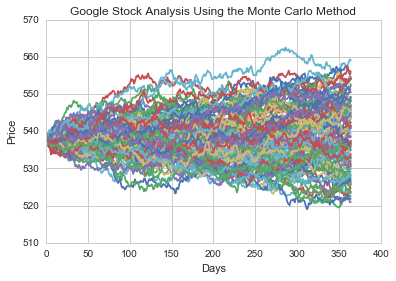

In [392]:
startPrice = 537.51

for run in range(100):
    plt.plot(stockMonteCarlo(startPrice, days, mu, sigma));
    plt.xlabel("Days");
    plt.ylabel("Price");
    plt.title("Google Stock Analysis Using the Monte Carlo Method");

In [393]:
'''
Above is the resulting plot of a year’s worth of random simulations. The Monte Carlo
Method applied to Google stock is how that was made possible. To make some sense of 
the distribution in the plot, a histogram of the results will be created next.

To create that histogram, a much larger run (10,000) will be carried out. After 
setting runs to 10,000, a new array called sims (simulations) will be created that 
will be set to zeros of the number of runs (so a 10,000 length array). Following that, 
a command will be given that basically will say that, for every run (for all 10,000 
runs), the run’s point in the simulation is going to be defined as the end price (or 
days - 1).
'''

'\nAbove is the resulting plot of a year’s worth of random simulations. The Monte Carlo\nMethod applied to Google stock is how that was made possible. To make some sense of \nthe distribution in the plot, a histogram of the results will be created next.\n\nTo create that histogram, a much larger run (10,000) will be carried out. After \nsetting runs to 10,000, a new array called sims (simulations) will be created that \nwill be set to zeros of the number of runs (so a 10,000 length array). Following that, \na command will be given that basically will say that, for every run (for all 10,000 \nruns), the run’s point in the simulation is going to be defined as the end price (or \ndays - 1).\n'

In [395]:
runs = 10000

sims = np.zeros(runs);

np.set_printoptions(threshold = 5);

for run in range(runs):    

    sims[run] = stockMonteCarlo(startPrice, days, mu, sigma)[days-1];

In [402]:
'''
Below, quantile will be used again to define risk for the stock. Numpy will be used to define 
a variable “q” as the 1% empirical quantile to dictate that 99% of the values fit within the 
output. There will be a lot of runs, so 200 bins will be allotted. What's going on with 
everything else will be displayed as on the histogram itself.
'''

"\nBelow, quantile will be used again to define risk for the stock. Numpy will be used to define \na variable “q” as the 1% empirical quantile to dictate that 99% of the values fit within the \noutput. There will be a lot of runs, so 200 bins will be allotted. What's going on with \neverything else will be displayed as on the histogram itself.\n"

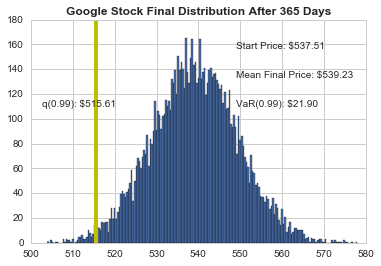

In [398]:
q = np.percentile(sims, 1)
    
plt.hist(sims, bins = 200)

plt.figtext(0.6, 0.8, s="Start Price: $%.2f" %startPrice)
plt.figtext(0.6, 0.7, "Mean Final Price: $%.2f" % sims.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (startPrice - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x = q, linewidth = 4, color = "y")

plt.title("Google Stock Final Distribution After %s Days" % days, weight = "bold");